In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True)
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from IPython import display

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
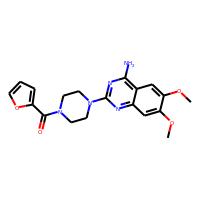
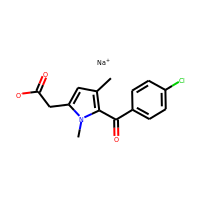
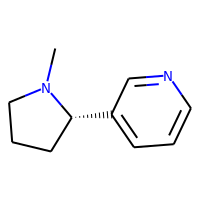
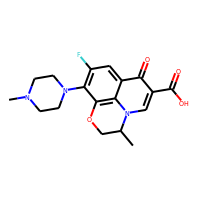
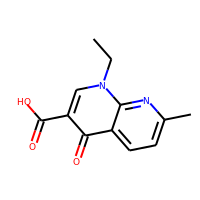

In [2]:
#Load the sdf from approved drugs download on chembl
df_meds = PandasTools.LoadSDF('/home/bournez/Bureau/dataset_meds.sdf', isomericSmiles=True)
df_meds.head()

In [3]:
#First let's look what we have
print(len(df_meds))
df_meds['molecule_type'].value_counts()

3371


Small molecule     3277
Protein              73
Unknown              17
Oligosaccharide       2
Oligonucleotide       2
Name: molecule_type, dtype: int64

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
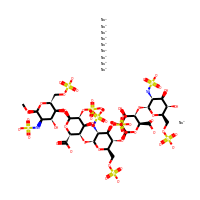
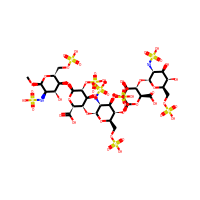

In [4]:
#Watch a category
df_meds[df_meds.molecule_type == 'Oligosaccharide'].head()

In [5]:
#On garde seulement une catégorie
df_meds = df_meds[df_meds['molecule_type'] == 'Small molecule']

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
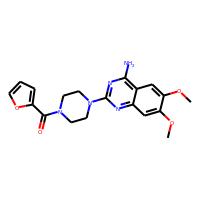
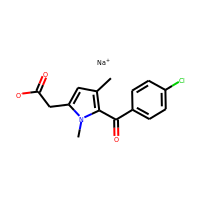
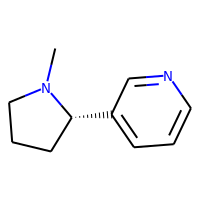
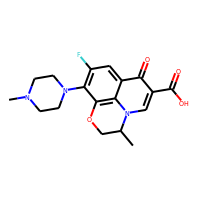
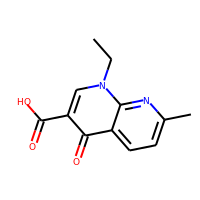

In [6]:
#On garde seulement les molécules seules
def number_frags(mol):
    return(len(Chem.rdmolops.GetMolFrags(mol)))

df_meds['Mixture'] = df_meds['ROMol'].apply(number_frags)
df_meds.head()

In [7]:
df_meds['Mixture'].value_counts()

1     2115
2      890
3      199
4       31
5       17
7        7
8        5
6        4
9        3
49       1
29       1
25       1
13       1
48       1
10       1
Name: Mixture, dtype: int64

In [8]:
df_meds = df_meds[df_meds['Mixture'] == 1]
len(df_meds)

2115

In [9]:
#On regarde les dates de sorties
df_meds['first_approval'].value_counts()

nan       626
1982.0    109
1996.0     47
1997.0     37
1985.0     36
1999.0     35
2015.0     32
1995.0     30
2014.0     30
1992.0     29
1991.0     29
1986.0     27
1984.0     26
1981.0     26
2001.0     26
1974.0     25
2009.0     25
1959.0     24
2011.0     24
2004.0     24
2012.0     23
2000.0     23
2008.0     23
1960.0     23
1993.0     23
1998.0     23
1979.0     22
1990.0     22
2006.0     22
1987.0     21
2013.0     21
1994.0     20
1976.0     20
1967.0     20
2003.0     20
1957.0     19
1989.0     19
2007.0     19
1978.0     19
1973.0     19
1964.0     19
2002.0     18
2010.0     18
1977.0     17
1983.0     17
1988.0     17
1961.0     17
1953.0     16
2016.0     15
1965.0     15
1950.0     15
2005.0     14
1962.0     14
1971.0     14
1955.0     14
1975.0     13
1980.0     13
1972.0     12
1970.0     12
1969.0     12
1956.0     12
1951.0     11
1954.0     10
1958.0     10
1963.0      9
1952.0      9
1968.0      8
1946.0      8
1966.0      7
1949.0      7
2017.0      6
1948.0

In [10]:
df_meds.dropna(subset=['first_approval'], inplace=True)
df_meds['first_approval'] = df_meds['first_approval'].astype(float)
len(df_meds)

2115

In [11]:
len(df_meds[df_meds['first_approval'] >= 2000])

383

In [12]:
df_meds[df_meds['first_approval'] >= 2000]['natural_product'].value_counts()

0    289
1     94
Name: natural_product, dtype: int64

In [13]:
df_meds = df_meds[df_meds['first_approval'] >= 2000]

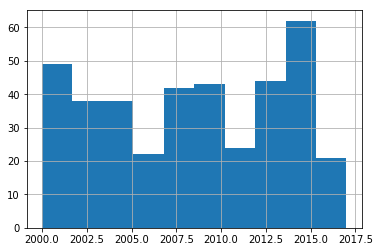

In [15]:
%matplotlib inline

#On peut regarder sous forme d'histogramme
df_meds['first_approval'].hist()


In [16]:
#On prépare ce qu'on a besoin pour l'ACP 
df_PCA = df_meds[['ID', 'natural_product', 'ROMol']]

### Calculating our descriptors 

In [17]:
#RDKIT Descriptors 
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Lipinski

#### Liste des descripteurs : 
#### ['FCSP3', 'HBA', 'HBD', 'LabuteASA', 'LogP', 'MQN10', 'MQN8', 'MW', 'NAR', 'NRB', 'TPSA']

In [18]:
df_PCA['MW'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
df_PCA['LabuteASA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.LabuteASA(m), 1))
df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
df_PCA['HBD'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
df_PCA['MQN8'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[7])
df_PCA['MQN10'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
df_PCA['NRB'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))

/home/bournez/anaconda3/envs/gson_35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/bournez/anaconda3/envs/gson_35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/bournez/anaconda3/envs/gson_35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

ID natural_product                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
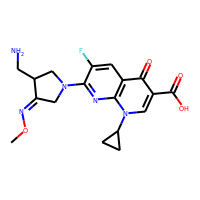
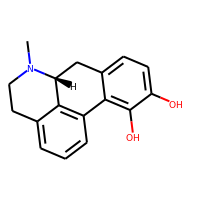
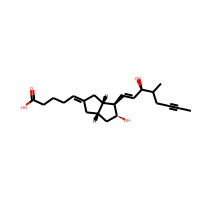
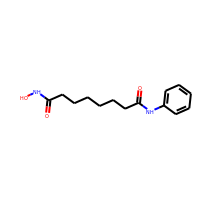
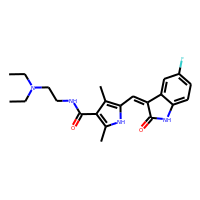

In [19]:
df_PCA.head()

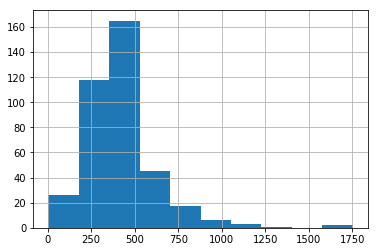

In [20]:
#Distribution des MWs
from IPython import display
%matplotlib inline
df_PCA.MW.hist()

In [21]:
#Pas au dessus de 700 et en dessous de 200 
df_PCA = df_PCA[df_PCA['MW'].between(200, 700)]
len(df_PCA)

318

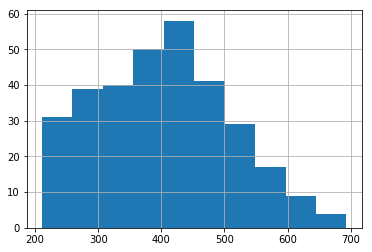

In [22]:
df_PCA.MW.hist()

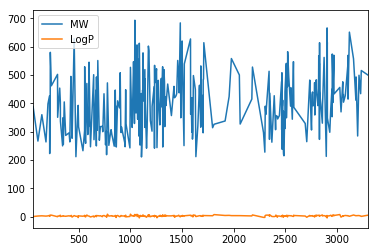

In [23]:
#On peut regarder la projection des molécules selon différentes variables 
df_PCA[['MW', 'LogP']].plot()

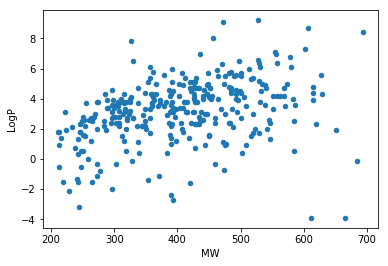

In [24]:
df_PCA.plot(x='MW', y='LogP', kind='scatter')

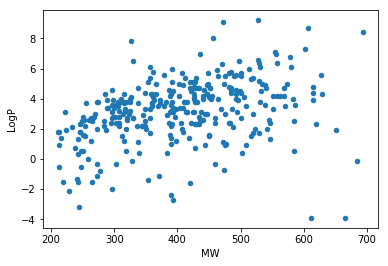

In [25]:
df_PCA.plot.scatter(x='MW', y='LogP')

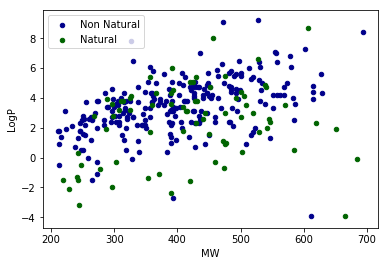

In [26]:
ax = df_PCA[df_PCA['natural_product'] == '0'].plot.scatter(x='MW', y='LogP', color='DarkBlue', label='Non Natural')
df_PCA[df_PCA['natural_product'] == '1'].plot.scatter(x='MW', y='LogP', color='DarkGreen', label='Natural', ax=ax)





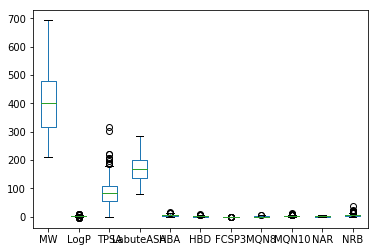

In [27]:
#on peut regarder les valeurs des différents descripteurs 
df_PCA.plot.box()

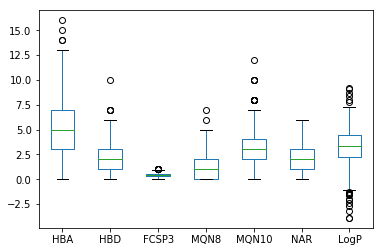

In [28]:
#Sans prendre en compte les valeurs trop grandes
x = list(range(7,13))
x.append(4)

df_PCA.iloc[:, x].plot.box()

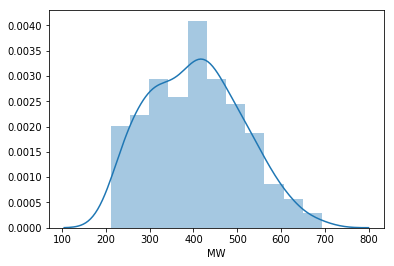

In [29]:
#La librairie seaborn peut-être plus adaptée pour les graphiques 
import seaborn as sns
import matplotlib.pyplot as plt #couplée avec

sns.distplot(df_PCA.MW, )

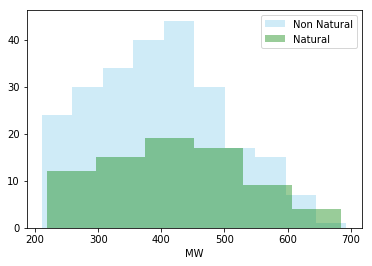

In [30]:
#On peut regarder la distribution sur le même graphique selon la catégorie
sns.distplot(df_PCA[df_PCA['natural_product'] == '0']['MW'] , color="skyblue", label="Non Natural", kde=False)
sns.distplot(df_PCA[df_PCA['natural_product'] == '1']['MW'] , color="green", label="Natural", kde=False)
plt.legend()

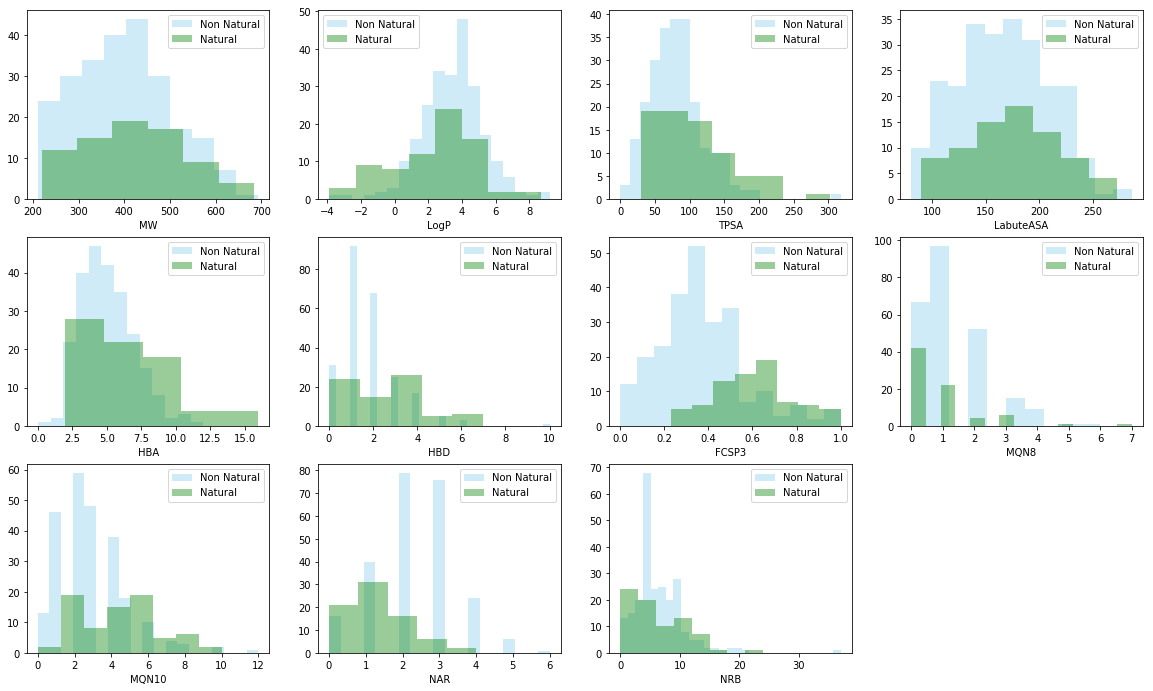

In [31]:
#Pour regarder tous les descripteurs :

plt.figure(figsize=(20, 16))

j=1
for i in df_PCA.iloc[:, 3:].columns:
    plt.subplot(4, 4, j)
    sns.distplot(df_PCA[df_PCA['natural_product'] == '0'][i] , color="skyblue", label="Non Natural", kde=False)
    sns.distplot(df_PCA[df_PCA['natural_product'] == '1'][i] , color="green", label="Natural", kde=False)
    plt.legend()
    j += 1


In [32]:
#Matrice de corrélation
df_PCA.corr()

MW      LogP      TPSA  LabuteASA       HBA       HBD     FCSP3      MQN8     MQN10       NAR       NRB
MW         1.000000  0.359521  0.452450   0.980062  0.561417  0.189812 -0.006953  0.186963  0.443247  0.376293  0.496977
LogP       0.359521  1.000000 -0.528681   0.419578 -0.361767 -0.510750 -0.106204 -0.269431 -0.321394  0.314197  0.167179
TPSA       0.452450 -0.528681  1.000000   0.385704  0.804565  0.722662 -0.029442  0.519983  0.742238  0.090495  0.309041
LabuteASA  0.980062  0.419578  0.385704   1.000000  0.509746  0.151885  0.003770  0.169105  0.388596  0.383524  0.502924
HBA        0.561417 -0.361767  0.804565   0.509746  1.000000  0.380308 -0.022404  0.310403  0.611059  0.243134  0.336820
HBD        0.189812 -0.510750  0.722662   0.151885  0.380308  1.000000  0.046633  0.513143  0.461032 -0.079675  0.199290
FCSP3     -0.006953 -0.106204 -0.029442   0.003770 -0.022404  0.046633  1.000000 -0.206889  0.211957 -0.757421  0.218829
MQN8       0.186963 -0.269431  0.519983   0.169105  0.310403  0.513143 -0.206889  1.000000  0.136114  0.116114  0.199157
MQN10      0.443247 -0.321394  0.742238   0.388596  0.611059  0.461032  0.211957  0.136114  1.000000 -0.197495  0.516191
NAR        0.376293  0.314197  0.090495   0.383524  0.243134 -0.079675 -0.757421  0.116114 -0.197495  1.000000  0.003577
NRB        0.496977  0.167179  0.309041   0.502924  0.336820  0.199290  0.218829  0.199157  0.516191  0.003577  1.000000

### Start ACP 

In [33]:
import prince   #bibliothèque équivalente à FactoMineR

df_PCA2 = df_PCA.copy() #On prend une copie car Prince effectue des changements sur le DF
pca1 = prince.PCA(df_PCA2, n_components=4)
pca1?

In [34]:
pca1.X.head() #= valeurs standardisées des descripteurs (DF)

MW      LogP      TPSA  LabuteASA       HBA       HBD     FCSP3      MQN8     MQN10       NAR       NRB
58  -0.139618 -1.047413  0.789689  -0.215856  1.045315  0.022450  0.079200  0.773937  0.387584 -0.028270 -0.316304
105 -1.296076 -0.185882 -0.968061  -1.184141 -0.907741  0.022450 -0.603683 -0.965370 -0.586738 -0.028270 -1.475112
143 -0.413566  0.149157 -0.212206  -0.265330 -0.907741  0.671445  1.157506 -0.965370  0.387584 -1.662777  0.378981
183 -1.324513 -0.329471 -0.198907  -1.304293 -0.907741  0.671445  0.007094  0.773937 -0.099577 -0.845523  0.378981
202 -0.053358  0.053432 -0.225506   0.043296 -0.907741  0.671445 -0.287883  0.773937 -0.586738 -0.028270  0.147220

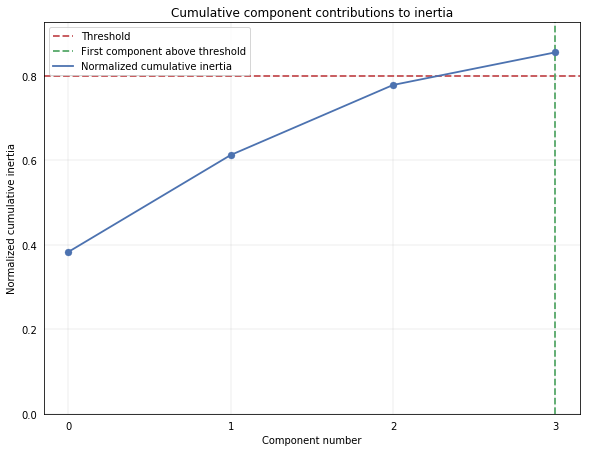

In [35]:
#Les fonctions pour représenter l'ACP sont incluses dans le package. 
fig1, ax1 = pca1.plot_cumulative_inertia()
plt.show()

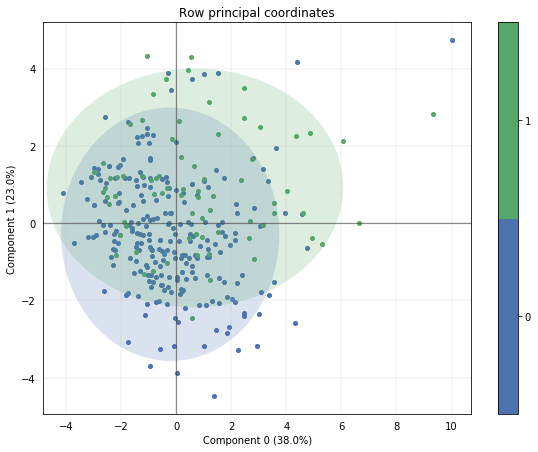

In [36]:
fig2, ax2 = pca1.plot_rows(color_by='natural_product', ellipse_fill=True)
plt.show()

(<matplotlib.figure.Figure at 0x7f9e439d7160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9e4358be48>)

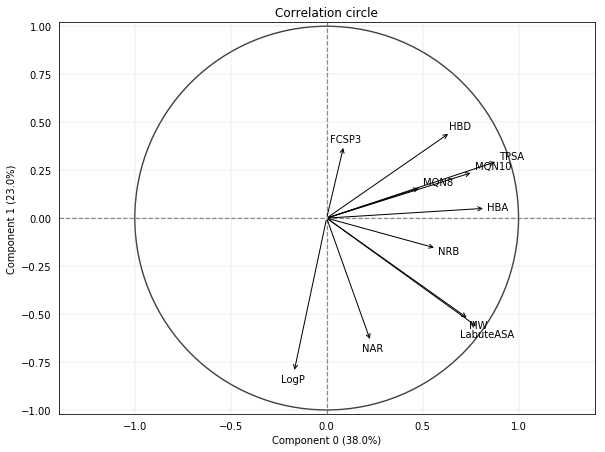

In [37]:
#Cercle des corrélations
pca1.plot_correlation_circle()

In [38]:
#Contributions des variables :
pca1.column_correlations

0         1         2         3
MW         0.741264 -0.576153  0.204747 -0.010019
LogP      -0.240022 -0.853407  0.290258  0.213116
TPSA       0.898253  0.305446 -0.200494 -0.112220
LabuteASA  0.696543 -0.620189  0.228753  0.029548
HBA        0.835542  0.039480 -0.109121 -0.369026
HBD        0.636805  0.465589 -0.211144  0.270831
FCSP3      0.016454  0.397024  0.830789  0.074770
MQN8       0.501016  0.171870 -0.439087  0.638230
MQN10      0.770822  0.255627  0.293977 -0.248404
NAR        0.186368 -0.692035 -0.616889 -0.140851
NRB        0.579810 -0.190296  0.446632  0.295657

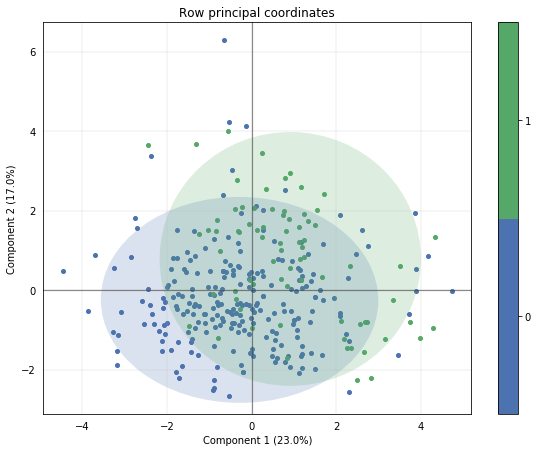

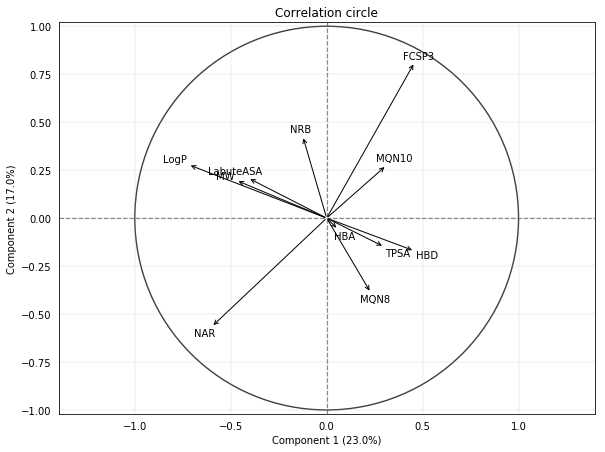

In [39]:
#On peut aussi représenter les autres composantes
fig1, ax1 = pca1.plot_rows(axes=[1,2], color_by='natural_product', ellipse_fill=True)
fig2, ax2 =pca1.plot_correlation_circle(axes=[1,2])

plt.show()


Populating the interactive namespace from numpy and matplotlib


/home/bournez/anaconda3/envs/gson_35/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


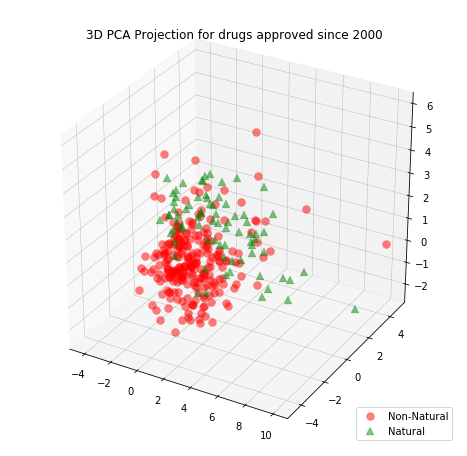

In [40]:
#Possible de représenter en 3D

#Besoin des indexes pour chaque catégorie
non_nat = pca1.categorical_columns[pca1.categorical_columns.natural_product == '0'].index
nat = pca1.categorical_columns[pca1.categorical_columns.natural_product == '1'].index


%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(pca1.row_principal_coordinates[0][non_nat], pca1.row_principal_coordinates[1][non_nat], pca1.row_principal_coordinates[2][non_nat], 'o', markersize=8, color='red', alpha=0.5, label='Non-Natural')
ax.plot(pca1.row_principal_coordinates[0][nat], pca1.row_principal_coordinates[1][nat], pca1.row_principal_coordinates[2][nat], '^', markersize=8, alpha=0.5, color='green', label='Natural')

plt.title('3D PCA Projection for drugs approved since 2000')
ax.legend(loc='lower right')

plt.show()

In [41]:
#Contribution de chaque valeur dans les composantes
pca1.row_component_contributions

0             1             2             3
58    7.768080e-04  1.507326e-03  8.421292e-04  6.415477e-04
105   4.720313e-03  5.597440e-04  1.349730e-03  1.364789e-03
143   3.016252e-04  1.899180e-03  6.365237e-03  3.667020e-04
183   6.721283e-04  3.589777e-03  1.098819e-04  6.219334e-03
202   5.259594e-05  3.443088e-07  4.017753e-04  6.510143e-03
217   1.976103e-04  3.169131e-03  4.831096e-04  2.854706e-03
219   6.703524e-03  2.531818e-03  4.986600e-04  1.396481e-03
224   8.644420e-05  8.446964e-04  1.531364e-04  7.966573e-04
225   3.832541e-03  1.337065e-02  1.956770e-03  4.207348e-04
235   8.317231e-04  5.474929e-03  3.686367e-04  3.412805e-04
295   7.866219e-04  1.610391e-03  1.045939e-03  1.122838e-05
296   7.109717e-05  6.202012e-04  3.329425e-03  2.874186e-03
316   2.609610e-04  1.540028e-03  1.163838e-03  2.557894e-03
322   1.135900e-05  1.980620e-05  2.937860e-02  8.314119e-03
323   1.110324e-03  1.766023e-03  4.002825e-06  2.575626e-04
344   4.775490e-03  1.368394e-03  2.678238e-07  2.003187e-03
347   1.081167e-03  1.235079e-04  1.933280e-03  4.068939e-03
351   5.777642e-03  3.974557e-06  5.053138e-04  1.806649e-03
360   3.704320e-05  9.154975e-05  4.176408e-05  3.057200e-04
374   4.300689e-03  1.726469e-03  1.201116e-04  2.139459e-03
407   5.034596e-03  1.035209e-03  5.583863e-04  4.339628e-05
414   2.186939e-03  1.670404e-03  1.069957e-04  4.007727e-03
424   2.349363e-03  1.377635e-04  6.320886e-04  3.876392e-03
428   6.476110e-05  3.417662e-03  3.670609e-05  2.907107e-05
430   1.293890e-03  1.933590e-03  2.682108e-04  1.640379e-03
431   1.001284e-03  1.072555e-03  4.859799e-04  1.566709e-03
436   6.307112e-06  8.736998e-03  4.166040e-03  2.483582e-03
456   8.483154e-03  4.270106e-03  1.122511e-03  6.801939e-03
473   3.063675e-03  2.807382e-03  6.848327e-03  3.937785e-04
493   1.211536e-03  3.126194e-04  1.606321e-03  4.805693e-03
495   1.446902e-02  2.165486e-02  1.276538e-03  9.229608e-04
499   1.514067e-03  1.140242e-03  9.207164e-04  1.813468e-03
541   6.016689e-03  2.452596e-03  9.283647e-05  7.319472e-04
557   3.834558e-04  4.622216e-04  5.067284e-03  9.118088e-03
558   1.304168e-03  5.043025e-03  1.011093e-05  2.921302e-04
564   5.149573e-04  6.573950e-03  2.866100e-03  3.222981e-03
567   1.534814e-03  6.210326e-03  2.081036e-03  1.070829e-03
579   2.231282e-06  7.523347e-03  6.463542e-07  5.022585e-04
588   4.931040e-03  5.915563e-05  2.425351e-04  3.711166e-04
591   1.542315e-03  7.589955e-05  6.218998e-03  6.865243e-04
597   2.083007e-04  1.656540e-03  4.352051e-04  2.605763e-03
600   5.321609e-03  5.081757e-06  7.299424e-03  9.681046e-03
614   1.111308e-03  8.894062e-03  1.124431e-03  2.289107e-03
645   9.453219e-03  7.939928e-05  3.066520e-03  1.349666e-02
648   2.573600e-04  1.733967e-02  6.448887e-04  6.176225e-03
666   1.217110e-06  2.444374e-03  4.462728e-05  1.381541e-04
671   1.408275e-03  5.413509e-03  7.069990e-04  2.050941e-03
672   5.388627e-04  5.626322e-03  2.799219e-03  8.996444e-04
675   8.408303e-04  1.612406e-03  6.373413e-04  6.003913e-03
680   1.179650e-03  6.444750e-04  9.638404e-04  2.443150e-03
685   7.164663e-03  3.995947e-03  2.619378e-04  5.439068e-03
700   2.538769e-03  1.745217e-03  3.362750e-03  2.105152e-03
710   1.896421e-03  1.897133e-05  2.040528e-04  1.671963e-03
729   7.861940e-04  1.865737e-02  6.512490e-03  6.392984e-04
733   6.243019e-03  1.184965e-04  1.359043e-03  2.057029e-03
745   4.169581e-04  1.007507e-03  1.049290e-02  7.576119e-03
760   1.573680e-03  1.548680e-03  7.604622e-03  1.106138e-03
768   9.943415e-05  1.772618e-03  4.422811e-03  2.820932e-02
770   8.073909e-04  2.336342e-02  3.067032e-03  1.286215e-03
778   9.268350e-04  7.081826e-03  1.960847e-02  4.071465e-03
792   4.972645e-03  3.962697e-04  5.631998e-03  1.581631e-04
808   2.459919e-03  1.477399e-04  2.454996e-03  4.296200e-04
814   6.030359e-04  1.548934e-03  2.521311e-03  6.690020e-03
822   6.606871e-03  2.207821e-03  5.183289e-03  8.141628e-06
825   6.672631e-04  3.302040e-03  1.184244e-07  1.71

In [42]:
df_PCA.columns

Index(['ID', 'natural_product', 'ROMol', 'MW', 'LogP', 'TPSA', 'LabuteASA', 'HBA', 'HBD', 'FCSP3', 'MQN8', 'MQN10', 'NAR', 'NRB'], dtype='object')

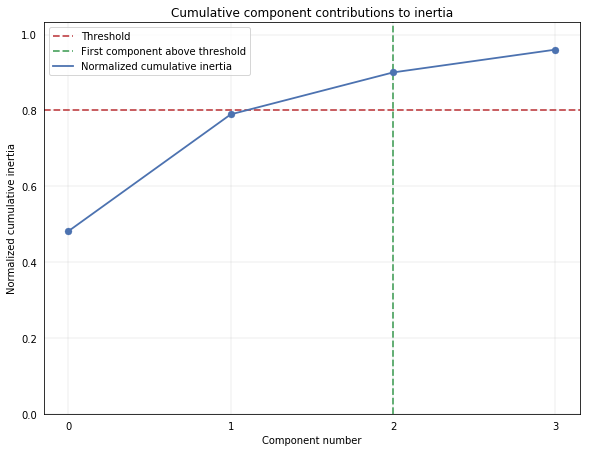

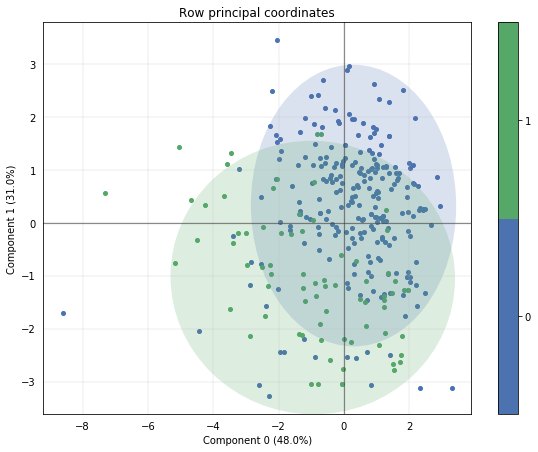

In [43]:
df_PCA_new=df_PCA[['ID', 'natural_product', 'TPSA', 'HBA', 'HBD', 'FCSP3', 'MQN10', 'NAR']]
df_PCA2 = df_PCA_new.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_rows(color_by='natural_product', ellipse_fill=True)

plt.show()

### Can we separate methods of administration

In [55]:
Ladm=[]
for a,b in df_meds[['oral', 'parenteral', 'topical']].iterrows():
    oral = b[0]
    parenteral = b[1]
    topical = b[2]
    if oral == 'True' and parenteral == 'False' and topical == 'False' :
        Ladm.append('O')
    elif parenteral == 'True' and oral == 'False' and topical == 'False' :
        Ladm.append('P')
    elif topical == 'True' and parenteral == 'False' and oral == 'False':
        Ladm.append('T')
    else :
        Ladm.append('M')


len(Ladm)

383

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
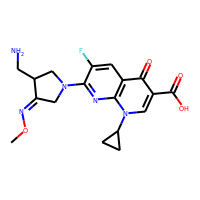
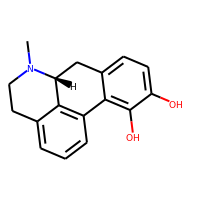
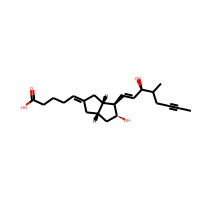
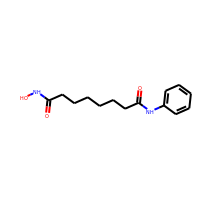
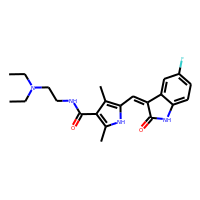

In [56]:
df_meds['Administration'] = Ladm
df_meds = df_meds[df_meds['Administration'] != 'M']

df_meds.head()

In [89]:
df_PCA = df_meds[['ROMol', 'Administration']]
# df_PCA['MW'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
# df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
# df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
# df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
# df_PCA['HBD'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
# df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
# df_PCA['MQN10'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
# df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
# df_PCA['NRB'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))
# df_PCA['Chi0'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))
# df_PCA['Bertz'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.BertzCT(m))
# df_PCA['ES'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi1(m))
# df_PCA['FP'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa1(m))
# df_PCA['FP1'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa2(m))
# df_PCA['FP2'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Kappa3(m))

df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
df_PCA['Chi0'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))
df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
df_PCA['Bertz'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.BertzCT(m))
len(df_PCA)

/home/bournez/anaconda3/envs/gson_35/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bournez/anaconda3/envs/gson_35/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/bournez/anaconda3/envs/gson_35/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

351

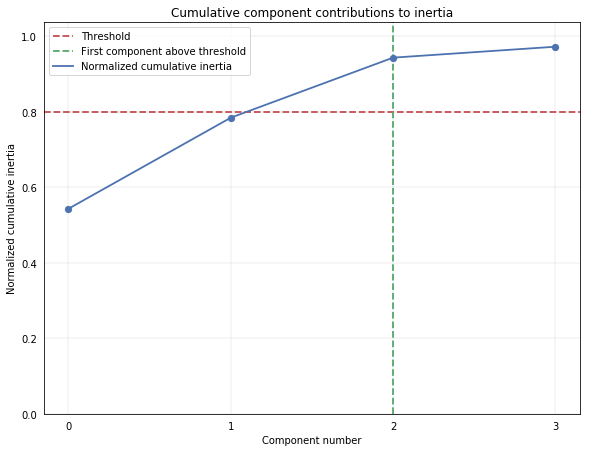

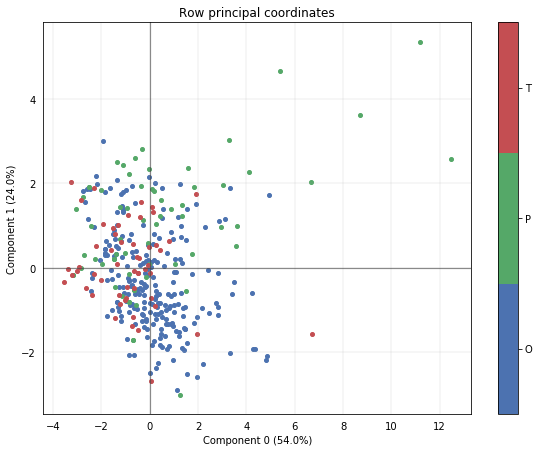

In [90]:
#df_PCA2['oral'] = df_PCA2['oral'].astype('category
df_PCA2=df_PCA.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_rows(color_by='Administration')
#fig3, ax3 = pca1.plot_rows(axes=[1,2], color_by='Administration', ellipse_fill=True)

plt.show()

### Examen?

ROMol                NaN cat
0  <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAIAAAAiOjnJAAAABmJLR0QA/wD/AP+gvaeTAAAVN0lEQVR4nO3deVBTV/sH8OcmCGFRBIpA0FJ3REQYim2ltbXii1aqVmtRHESLlRdhsLgM1HEIVKVqRfODumGlYnF5lY4al7GF1mpbF4S61aVYRZTNBS2LgQRyz++P4+TNK0JJ7j0EnOczHcYmuScP8OUu555zwhFCACGxScxdAHoxYbAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGCzGBwUJMYLAQExgsxAQGi6Hq6urbt2+vXr361q1b5q6lo3GEEHPX0HE0Gk1NTU2vXr064L10Ot2YMWNKS0tv374NAF5eXtOmTZsxY8bgwYM74N3N7kULlkajqa6urqysrKioaPn13r17gwYNCg0NTUxMlMlkTCtJTk5OSUlxcHAYPXp0fn5+bW0tfdzPz+/DDz+cNm3awIEDmRZgZqQra2xsXLJkSXh4+JgxY7y8vHr27Nn2N9utW7fu3bsDQFxcHNPCTpw4IZVKJRJJXl4erVOlUoWHh9vb2+uL8fLyUigUV69eZVqJuXThPVZFRUVUVNSxY8eam5v1D1paWjo5Ocnlcjc3N8OvDg4Ocrncw8Pj4sWLb7zxRlNTk0qlCgkJYVHYo0eP/Pz87ty5k5SUlJKSYviURqP55ZdfDh06tHv37gcPHtAH6VEyNDR0yJAhLOoxD3Mn23SJiYkA4Ofnt3379mPHjl2+fPnBgwft2XDNmjUA4OzsXFlZKXpVPM9PnDgRAN56662mpqbWXqbRaA4fPhwREWG4lx02bNjKlStFL8ksumqw6uvrnZycAOD06dPGbqvT6YKCggAgODiY53lxC0tLSwMABweH27dvt+f1zc3Nv/zyS1xcHL2k8PT0PH78uLglmUVXDdb69esBYNSoUaZtXlVV5eLiAgBKpVLEqgoLCy0tLTmOO3DggLHbarXapKQkAJg0aZKIJZlLlwxWc3Nzv379AODgwYMmN3LkyBGO46ysrM6fPy9KVXV1dYMGDQKABQsWmNbC/v37AWDy5Mmi1GNeXTJYe/bsAYBBgwbpdDoh7URHRwOAl5fXkydPhFc1c+ZMAPDx8WloaDCthe+++w4ApkyZIrwYs+uSwXrttdcAYPPmzQLbaWhoGDZsGADMnz9fYFNff/01ANjZ2V2/ft3kRnJzcwFg6tSpAovpDLpesH7++Wd6TadWq4W3dvnyZWtrawAw4axI78qVKzY2NgCwY8cOIcXs3bsXAKZNmyakkU6i690rpJddMTExNBACeXt7p6amAsDcuXMrKipMaKGxsTEsLEytVs+ePTs8PFxIMYQQAOA4TkgjnYW5k22c69evSyQSmUxWVVUlVps8z9Oe0rffftuEk7ZPPvkEAAYOHFhbWyuwkt27dwPA9OnTBbbTGViYOddGSktL43l+zpw5tLNAFBzHbdu2bfjw4SdOnEhLS1uyZMkzL2hoaGjt5mNZWZmFhUW3bt327dtHbxYJQV6gPVZXCtb9+/dzcnI4jouLixO35V69em3fvn38+PFLly4tKSmxsLCoqKioqqoqLy+vqqpqbGxsY1tra2udTldXVye8DJ7nAUAi6XrnJy11pWBt2LChoaFh8uTJnp6eojceHBw8ceLE3377bdOmTc88JZPJWt581N+C3LBhQ2pq6owZMy5evOjo6CikBtxjmYFard64cSMALFq0iNFbPHjw4OHDh0FBQSEhIa6uru7u7q6urnK5nF7xtSYlJeX48eOnT5+Oiorat2+fkAJepD1Wlzl5z8jIAICAgABG7RcUFACAg4NDXV2dsdvevHmzR48eAPDNN98IqeGbb74BgIiICCGNdBKdaI+l1WofPnxoeGr8+PFj/f+WlpZyHDd//nxG706HPERHR9vZ2Rm7bb9+/TIyMiIiImJjY0eOHElv7JiAEAIvyh7LbMHatm3bzZs39efI9+7d049Pei6O4wghR44cmT17tujFlJSU7N+/38rKKjY21rQWZs2a9f333+/atSssLOzUqVOWlpYmNPIiHQrNECye56Ojo/Py8kpKSp55ysHB4bnnyHK5nOd5f3//3NzcrKysjz/+WNyS1q1bp9PpIiIi3NzcTG5k48aNp0+fLioqSk5Opp2uxiIv0Mm7Gc6x6K1WJyen5OTkrKysI0eOXLhwobKy0nBolFarvXv37pkzZw4ePKhSqeiD3377LQDY2toKuR/XUnV1tZ2dHcdxFy9eFNjU2bNnu3XrJpFIfvzxRxM2X7FiBQDMnj1bYBmdgRmCNXLkSADIyMgghDQ3N+/fvz8jI2PZsmWzZ89+7733fHx8XFxcDP9qvby89NvSEQT+/v4ajUasepYvXw4A7733niitKRQKAHB3d3/48GE7N/njjz9WrVoVGBjIcVzfvn179Ohx+PBhUYoxo44O1tmzZwHA0dGRXnzxPG9lZdVyPyqVSuVyub+/f0hISHx8vH7zuro6OrklISFBlHoaGxvp4c+0fUxLOp3unXfeAYAPPvig7Zf9+uuvixYtogPLqJ49e9LvjuO4xYsXa7VaUUoyi44O1pQpUwBg2bJl+kc+/vjj6OjolJSUrVu3Hjp0qKioqKKioo17dgUFBfRwk5+fL7weOtzFx8dHxDHKd+7coT2lmZmZzzylH4gsl8v1eXrppZfCw8NVKpVGo+F5XqlU0nP/V1999caNG6KU1Mboe0Y6NFi3bt2SSqVWVlYVFRVC2qFTX9zd3ds5e6I1PM8PHToUAHJycoS00xLtKbWxsbl27RohRK1Wq1SqefPmOTs76/Pk4eERFxeXl5fX8rdeUFDQv39/AOjRo8euXbtMLkOn0+Xl5YWEhMyYMSMwMFCssbLt0aHBiomJAYDIyEiB7eh0utGjR4PgUbyHDx8GgN69e7M46ERERND0vP/++4Z998OGDUtKSvrH33FNTc306dPpJuHh4fX19Ua9e21tbXp6+oABA2gLdIiRTCbbuHGjgO/JCB0XrOrqaltbW47j/vjjD+Gt3b17lx5uhIwjpelcu3at8Hpaqq2tdXZ2dnBw0F+CKBQKugNrv+zsbBrKIUOGtPOitaSkJCEhQX/Xsm/fvqtWraqsrNTfuZ88eXJ1dbVJ35MROi5Yn3/+OQBMmDBBrAbpQF6ZTHbp0iUTNi8sLKTHmr///luskgzV1NTQWfy9e/cuLy83uZ0rV67Q8dMymaztOUWFhYXh4eEWFk/7JgMDA/fu3Wt4nN27dy+div3KK69cPHPG5JLao4OC1djY6OrqCgA//fSTiM3OmTMHALy9vU2YvzBjxgwAWLJkiYj1GKL3iCQSiUQiEXhOqVar9fubKVOmPHr0yPBZjUazd+/eN954g77A0tJy2rRpZ1rJTWlp6ciRIz2dnJrd3YlCQYTNRmlDBwVr69atADB8+HBxm62vr6eLtxh2SRiqqam5evXq8ePHv/3227Vr18bHx4eFhY0aNWrw4MG2trZSqfTOnTvilkRptdqXX34ZAMSa90EI2bdvH5027eHhcerUKULI48ePlUplnz59aKR69eqVkJBw9+7df6ytbMUKwnEEgPzrX0S8sbiGOiJYPM97eXkBwM6dO0VvXD9HdOHChatXr16w
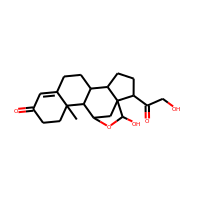
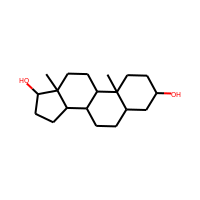
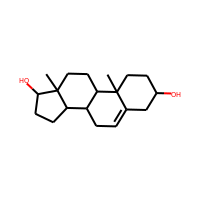
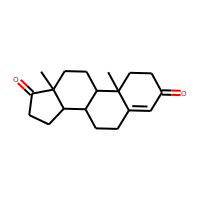
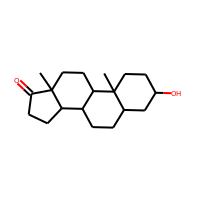

In [921]:
test = PandasTools.LoadSDF('/home/bournez/Bureau/steroids.sdf', idName=None)
test['cat']=['ST' for x in test.ROMol]
for mol in test.ROMol:
    Chem.AllChem.Compute2DCoords(mol)
    mol.SetProp('_Name', '')
test.head()

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
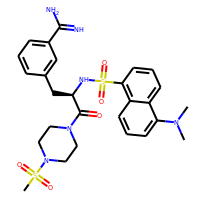
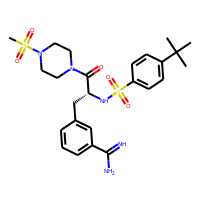
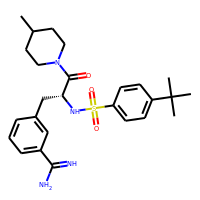
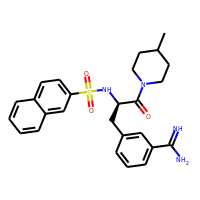
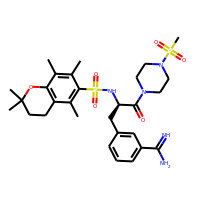

In [922]:
test2= PandasTools.LoadSDF('/home/bournez/Bureau/thrombin.sdf')
for mol in test2.ROMol:
    Chem.AllChem.Compute2DCoords(mol)
test2['cat']=['TH' for x in test2.ROMol]

test2.head()


RDKit WARNING: [15:08:15]  deprecated group abbreviation ignored on line 1604
RDKit WARNING: [15:08:15]  S group SUP ignored on line 1607


ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
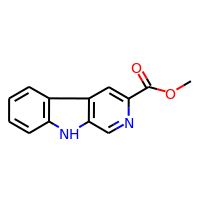
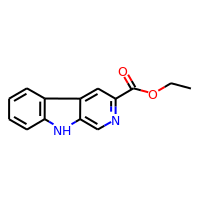
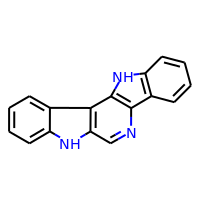
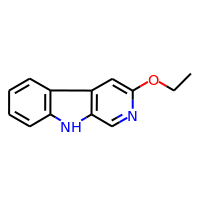
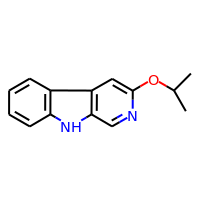

In [923]:
test3 = PandasTools.LoadSDF('/home/bournez/Bureau/benzo.sdf')
test3['cat']=['BZ' for x in test3.ROMol]
test3.head()

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
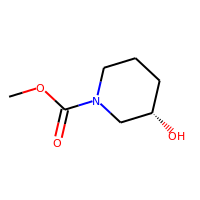
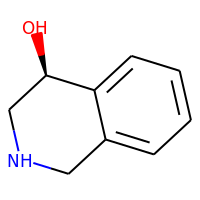
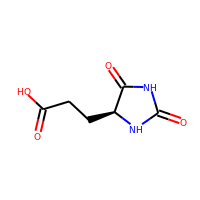
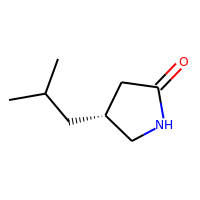
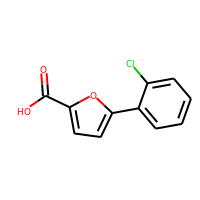

In [924]:
test4 = PandasTools.LoadSDF('/home/bournez/Téléchargements/chbrbb-interesting.sdf')
test4=test4.sample(50)
test4['cat']=['Fr' for x in test4.ROMol]
test4.head()

In [925]:
alls=pd.concat([test[['ROMol', 'cat']], test2[['ROMol', 'cat']], test3[['ROMol', 'cat']], test4[['ROMol', 'cat']]], ignore_index=True)
len(alls)

190

In [787]:
test.EXACT_MASS = test.EXACT_MASS.astype(float)
test = test[test.EXACT_MASS.between(200, 700)]
len(test)

2337

ALOGPS_LOGP ALOGPS_LOGS ALOGPS_SOLUBILITY        CAS DATABASE_ID DATABASE_NAME  EXACT_MASS   FORMULA ID                                                                          INCHI_IDENTIFIER                    INCHI_KEY JCHEM_ACCEPTOR_COUNT JCHEM_ATOM_COUNT JCHEM_AVERAGE_POLARIZABILITY JCHEM_BIOAVAILABILITY JCHEM_DONOR_COUNT JCHEM_FORMAL_CHARGE JCHEM_GHOSE_FILTER                                                                         JCHEM_IUPAC            JCHEM_LOGP JCHEM_MDDR_LIKE_RULE JCHEM_NUMBER_OF_RINGS JCHEM_PHYSIOLOGICAL_CHARGE JCHEM_PKA JCHEM_PKA_STRONGEST_ACIDIC JCHEM_PKA_STRONGEST_BASIC JCHEM_POLAR_SURFACE_AREA JCHEM_REFRACTIVITY JCHEM_ROTATABLE_BOND_COUNT JCHEM_RULE_OF_FIVE JCHEM_TRADITIONAL_IUPAC JCHEM_VEBER_RULE MOLECULAR_WEIGHT                  NAME                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
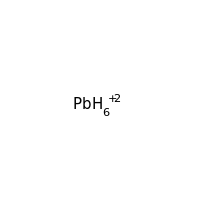
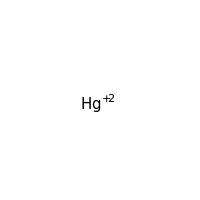
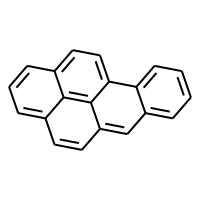
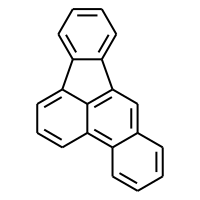
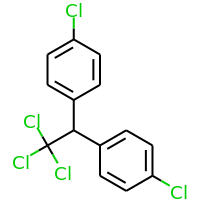

In [788]:
test['Toxin'] = ['1' for x in test['EXACT_MASS']]
test.head()

ID natural_product                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
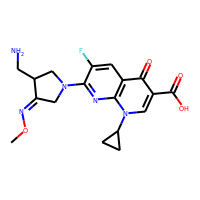
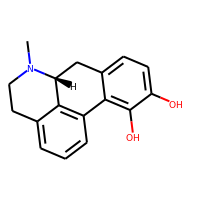
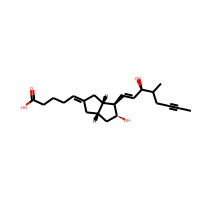
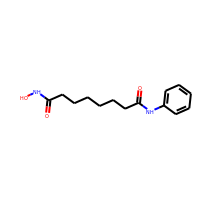
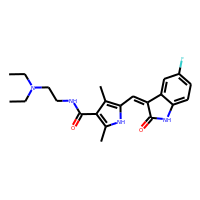

In [789]:
df_PCA['Toxin'] = ['0' for x in df_PCA['ID']]
df_PCA.head()

In [926]:
# df_PCA_t = df_PCA[['ROMol', 'Toxin']]
# test_t = test[['ROMol', 'Toxin']].sample(300)

#alls = pd.concat([test_t, df_PCA_t])
#alls = df_PCA

alls['MW'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
alls['LogP'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
alls['TPSA'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
alls['LabuteASA'] = alls.ROMol.map(lambda m: round(Chem.Descriptors.LabuteASA(m), 1))
alls['HBA'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
alls['HBD'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
alls['FCSP3'] = alls.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
alls['MQN8'] = alls.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[7])
alls['MQN10'] = alls.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
alls['NAR'] = alls.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
alls['NRB'] = alls.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))
alls['Chi'] = alls.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))

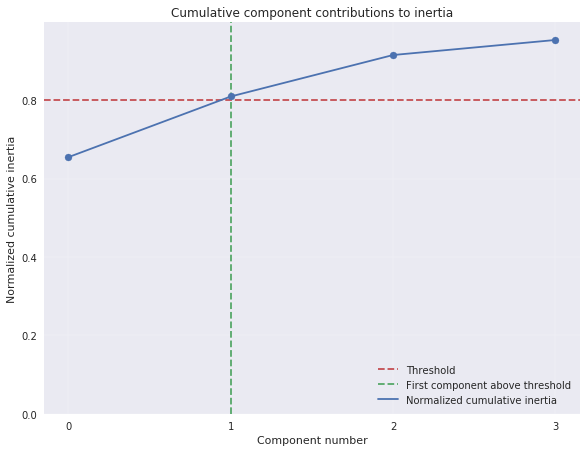

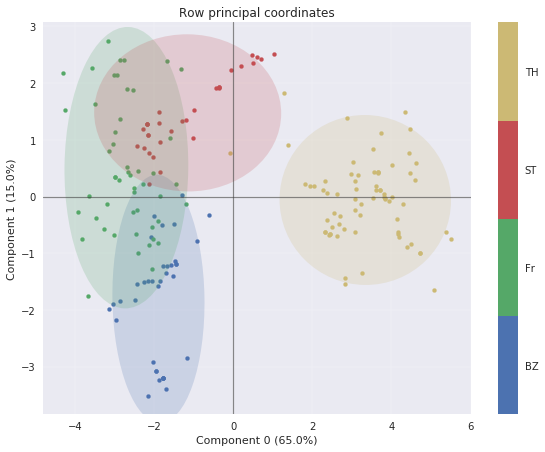

In [927]:
#df_PCA2['oral'] = df_PCA2['oral'].astype('category
df_PCA2=alls.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_rows(color_by='cat', ellipse_fill=True)
#fig3, ax3 = pca1.plot_rows(axes=[1,2], color_by='Administration', ellipse_fill=True)

plt.show()

In [928]:
PandasTools.WriteSDF(alls, '/home/bournez/Bureau/exam.sdf', properties=['cat'])

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
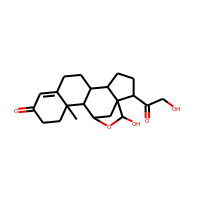
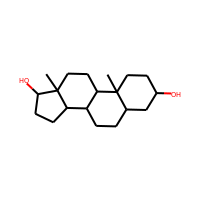
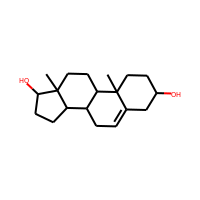
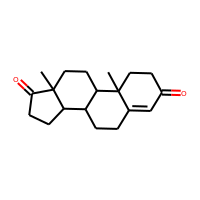
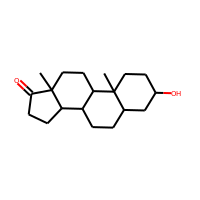
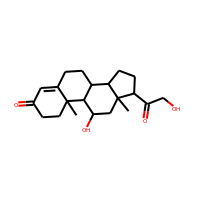
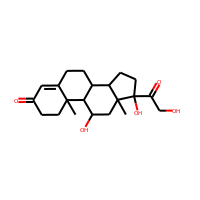
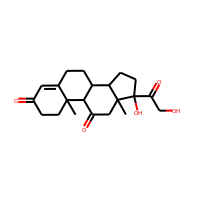
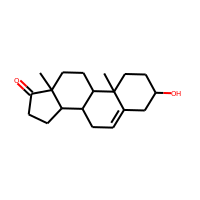
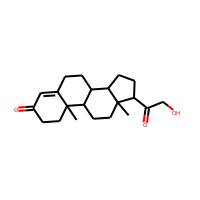
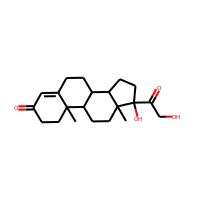
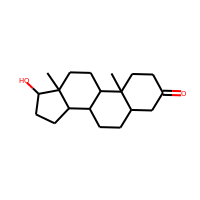
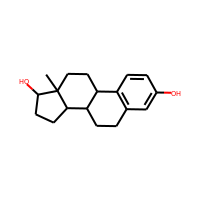
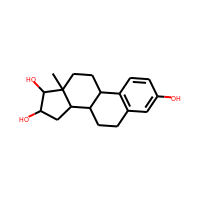
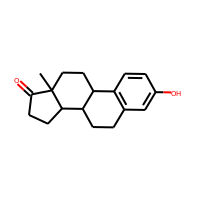
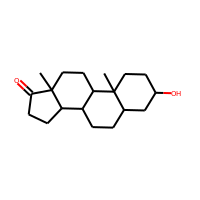
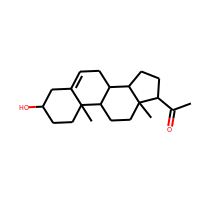
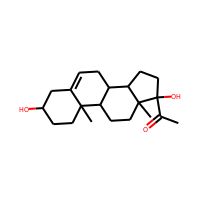
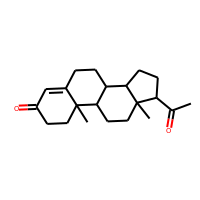
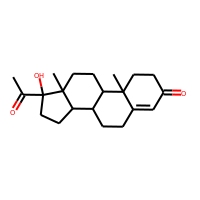
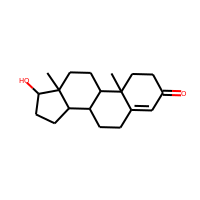
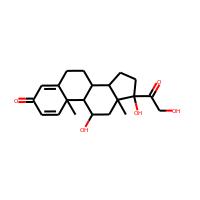
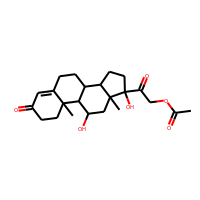
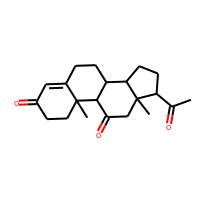
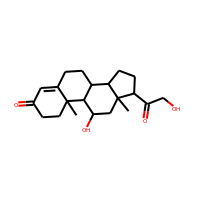
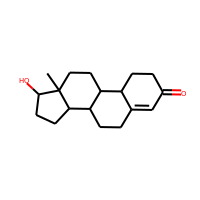
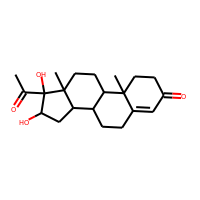
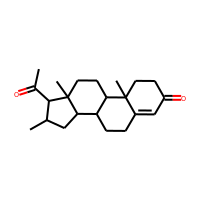
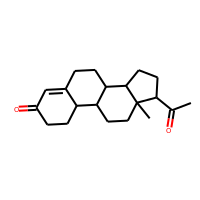
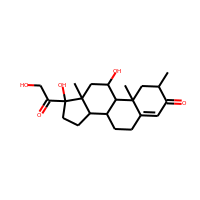
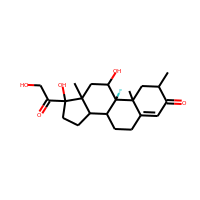
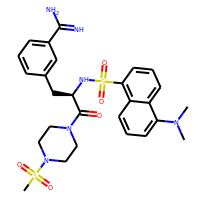
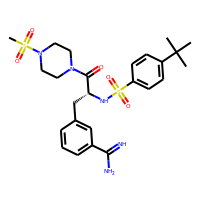
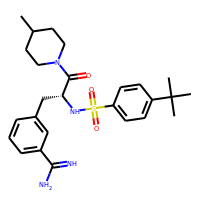
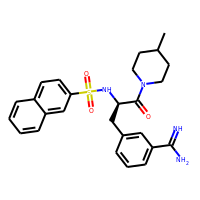
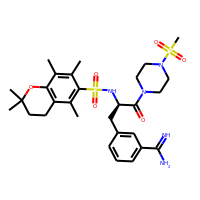
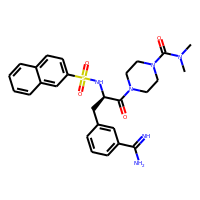
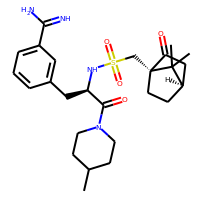
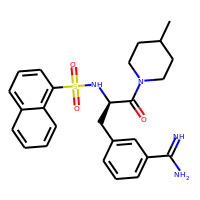
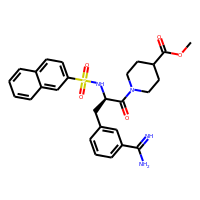
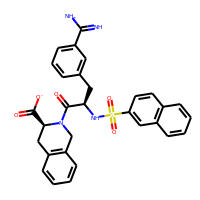
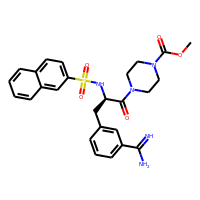
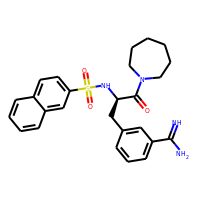
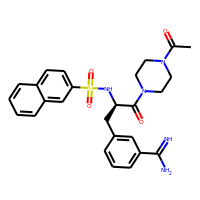
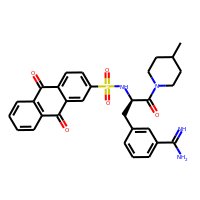
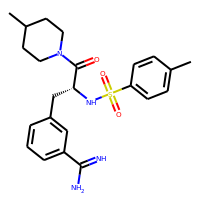
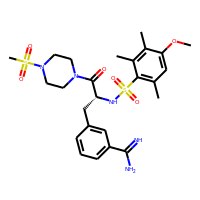
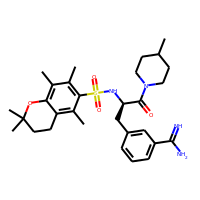
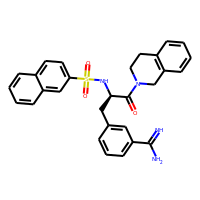
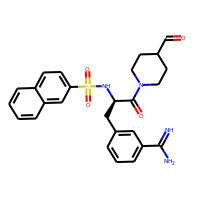
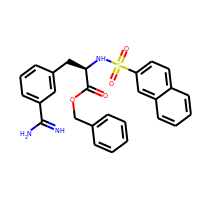
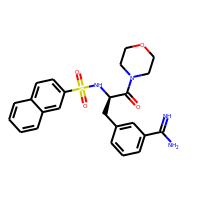
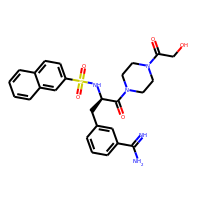
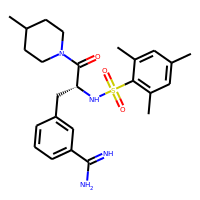
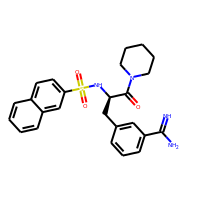
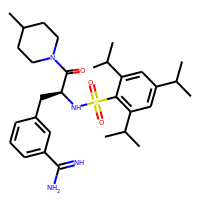
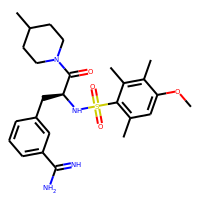
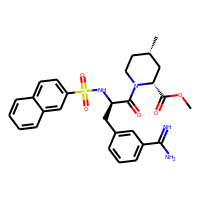
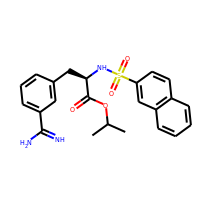
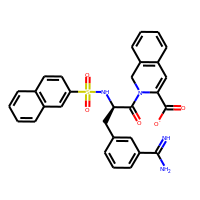
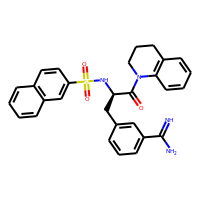
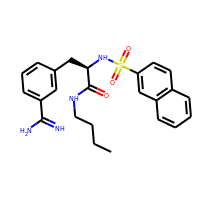
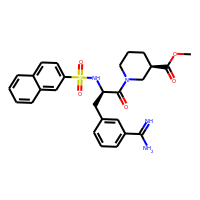
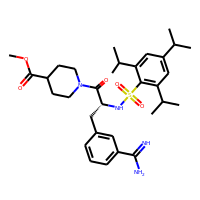
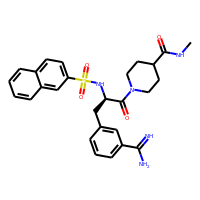
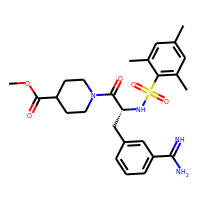
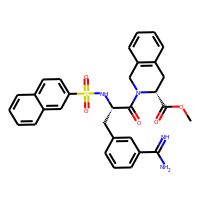
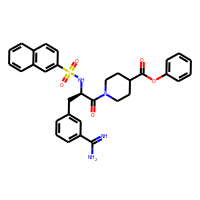
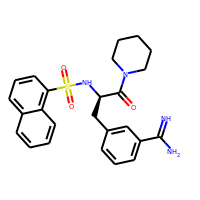
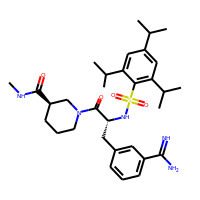
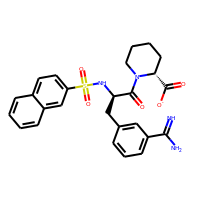
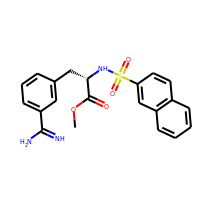
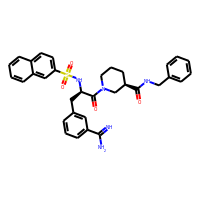
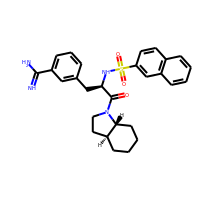
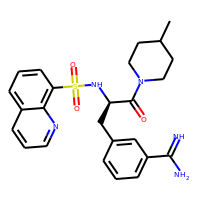
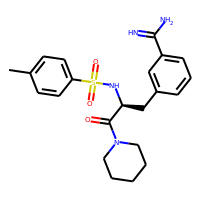
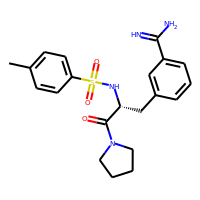
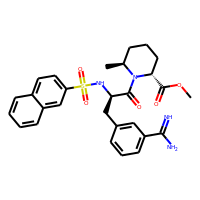
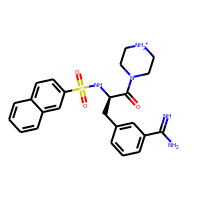
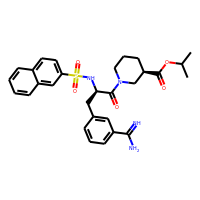
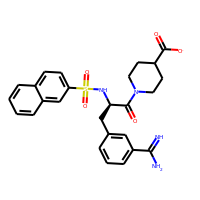
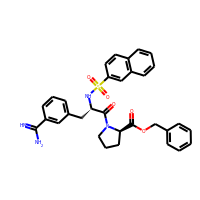
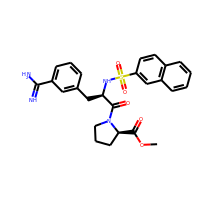
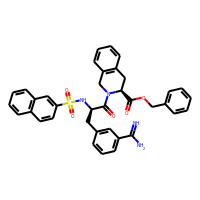
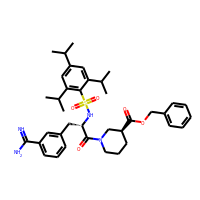
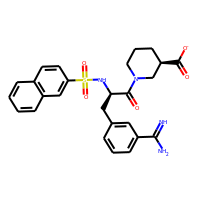
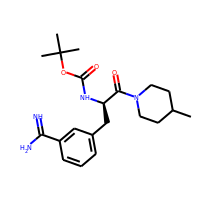
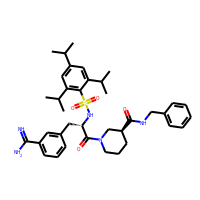
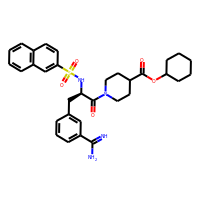
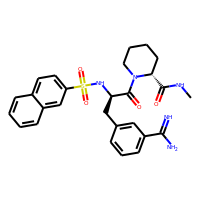
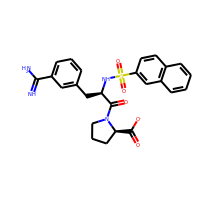
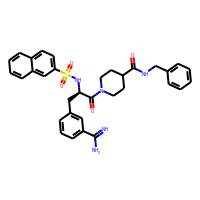
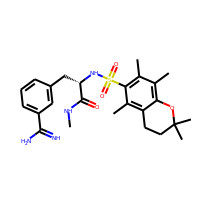
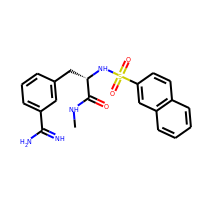
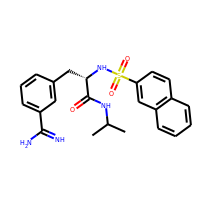
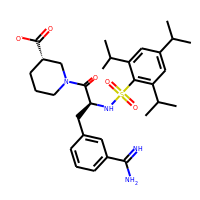
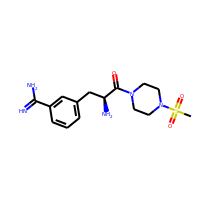
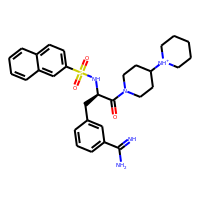
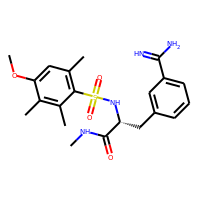
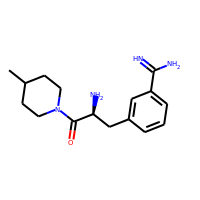
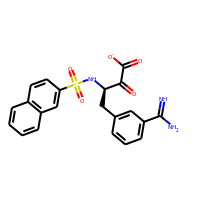
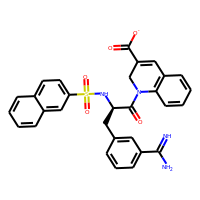
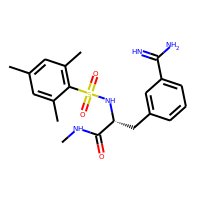
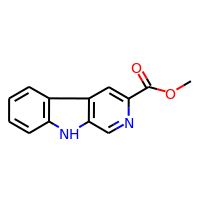
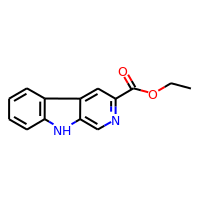
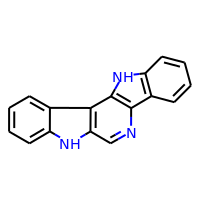
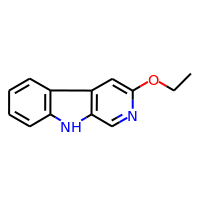
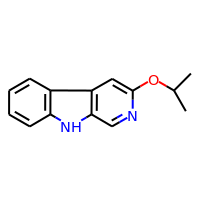
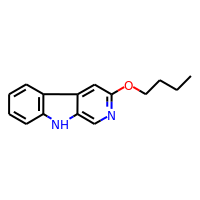
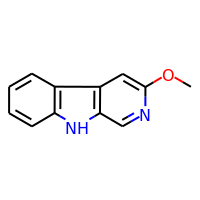
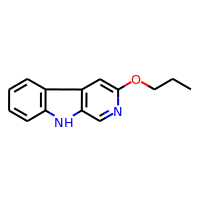
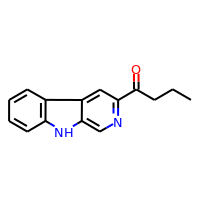
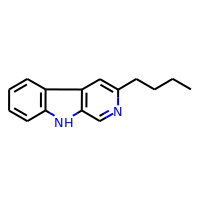
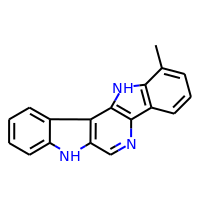
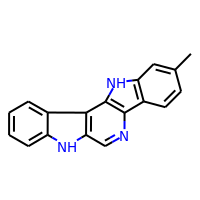
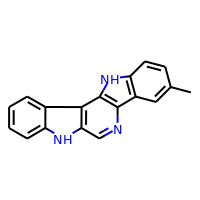
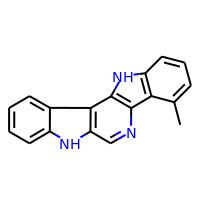
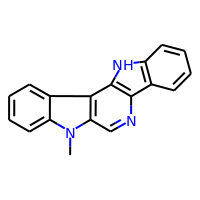
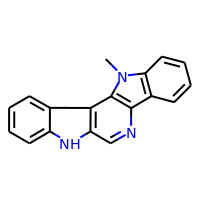
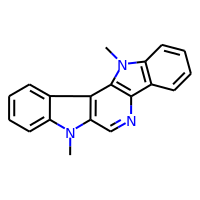
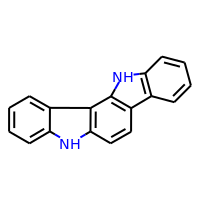
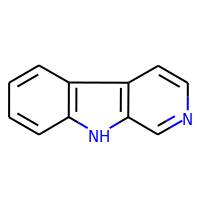
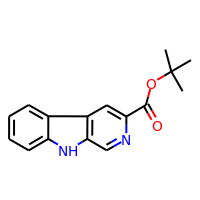
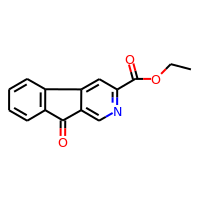
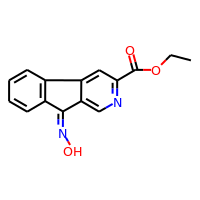
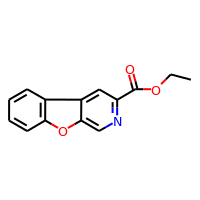
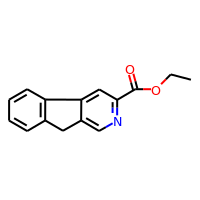
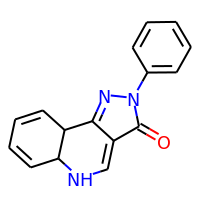
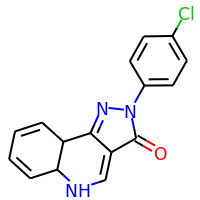
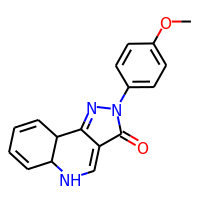
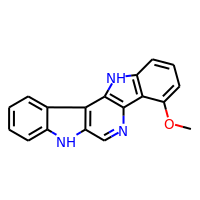
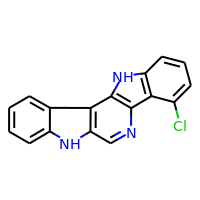
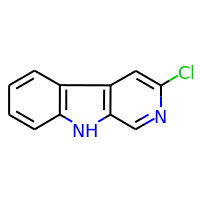
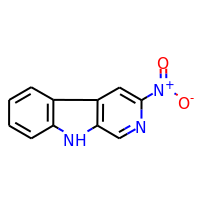
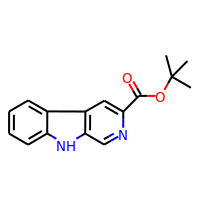
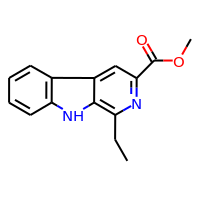
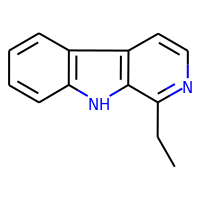
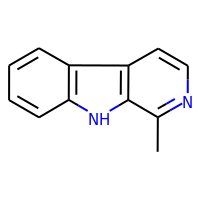
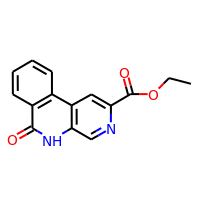
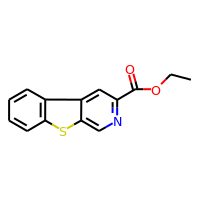
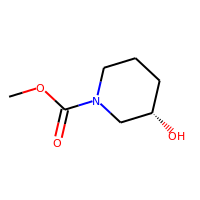
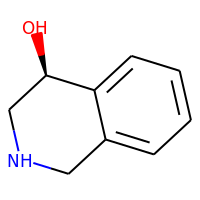
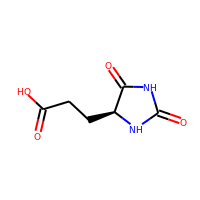
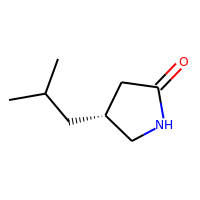
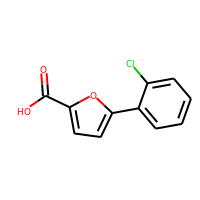
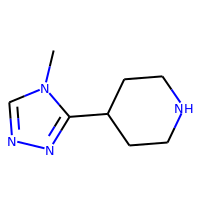
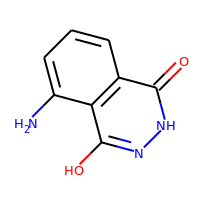
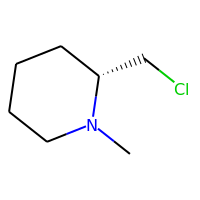
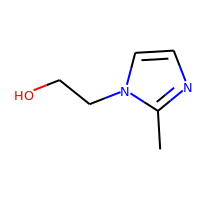
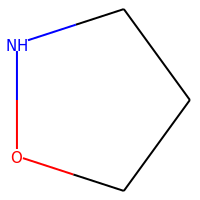
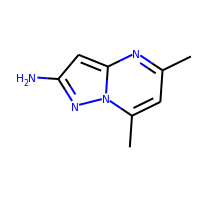
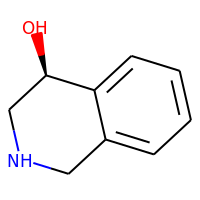
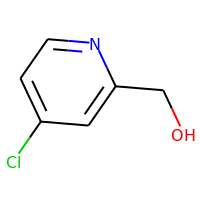
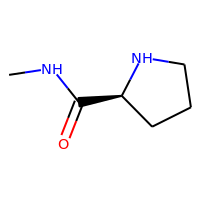
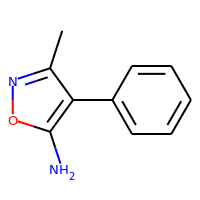
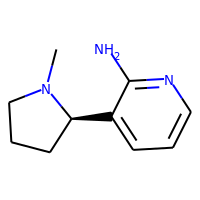
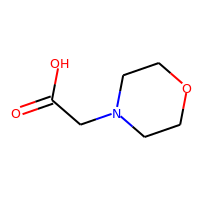
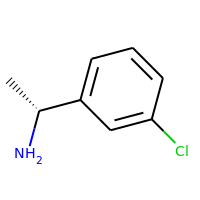
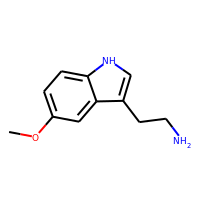
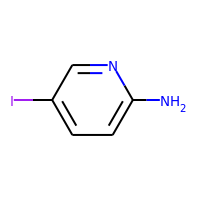
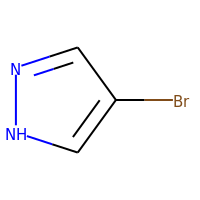
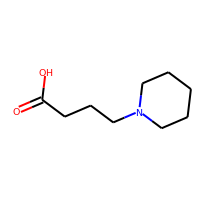
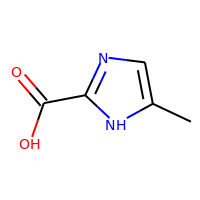
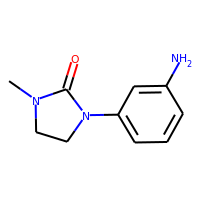
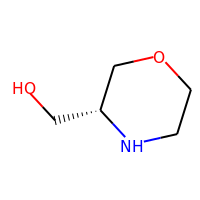
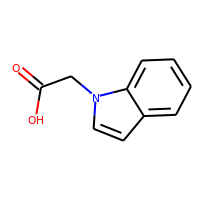
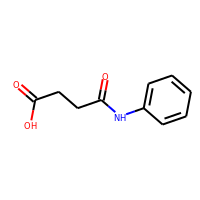
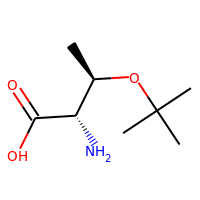
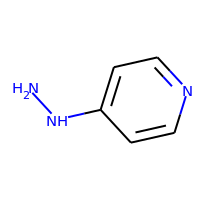
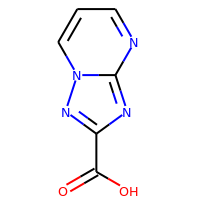
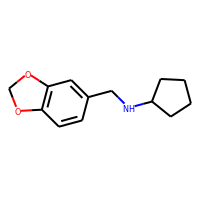
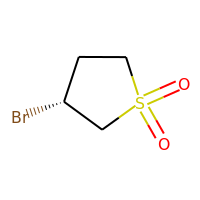
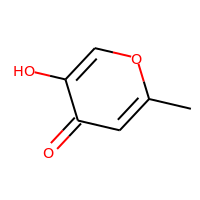
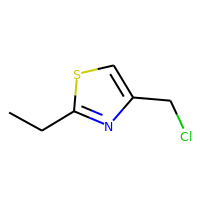
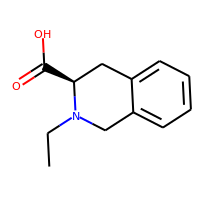
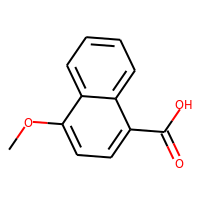
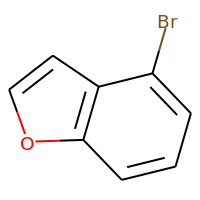
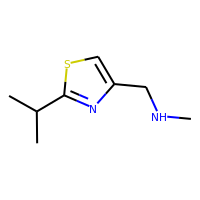
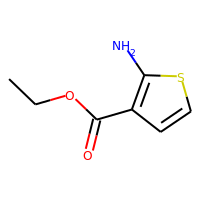
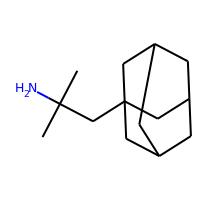
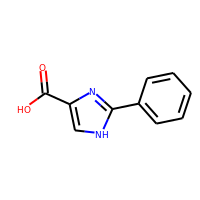
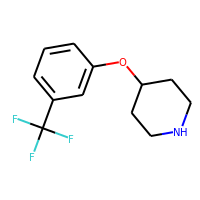
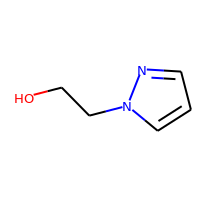
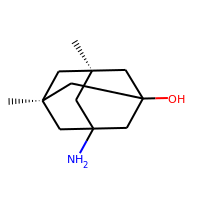
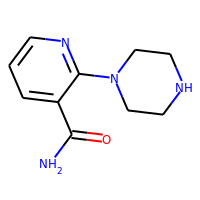
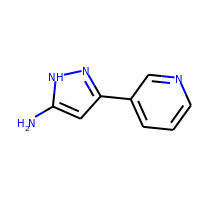
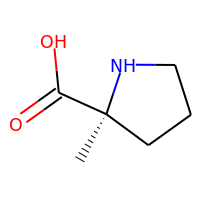
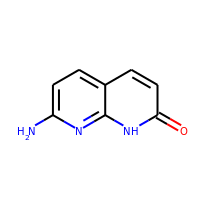
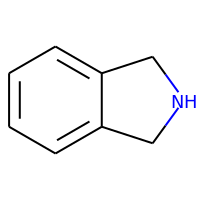
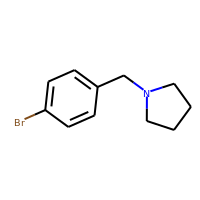

In [929]:
PandasTools.LoadSDF('/home/bournez/Bureau/exam.sdf')

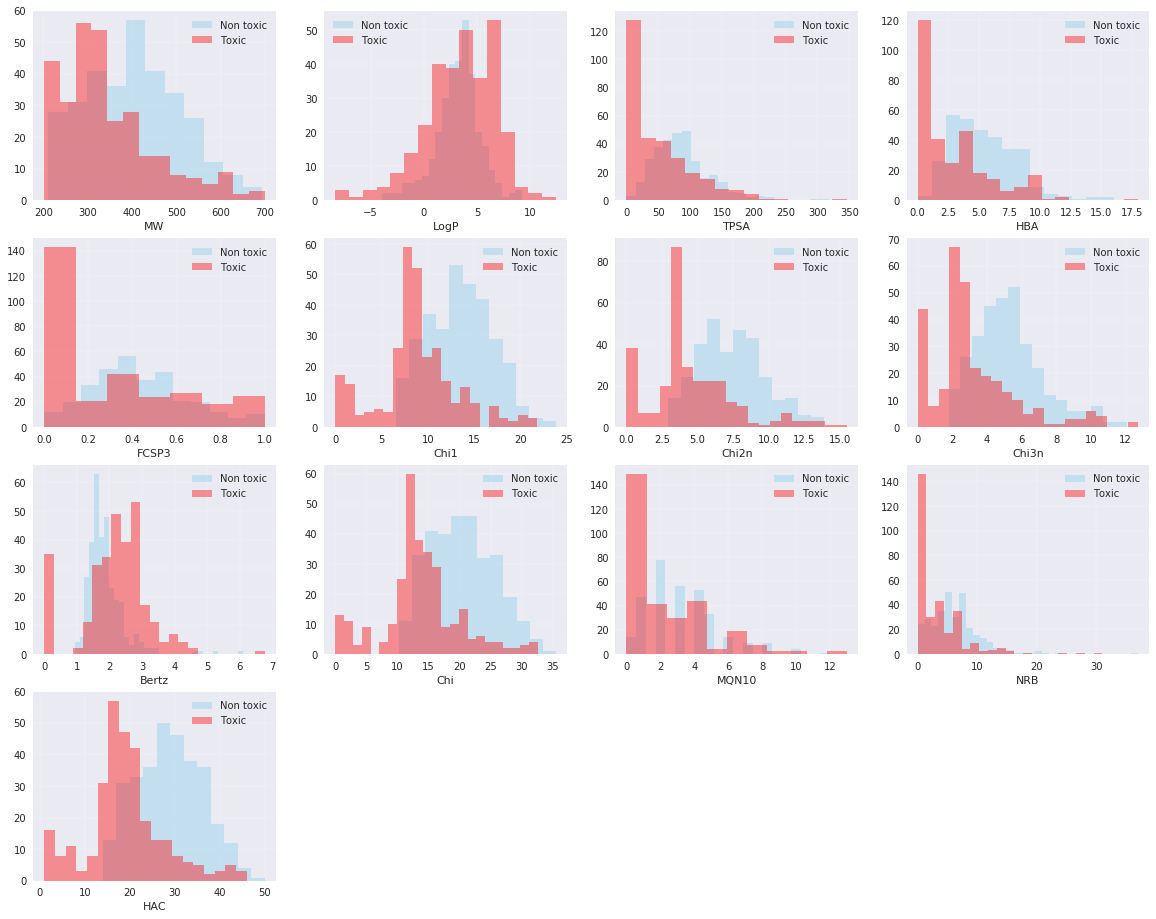

In [817]:
#Pour regarder tous les descripteurs :
plt.figure(figsize=(20, 16))

j=1
for i in alls.iloc[:, 2:].columns:
    plt.subplot(4, 4, j)
    sns.distplot(alls[alls['Toxin'] == '0'][i] , color="skyblue", label="Non toxic", kde=False)
    sns.distplot(alls[alls['Toxin'] == '1'][i] , color="red", label="Toxic", kde=False)
    plt.legend()
    j += 1

### With Scikit-Learn

In [307]:
# split data table into data X and class labels y
X = df_PCA.iloc[:, 3:].values
y = df_PCA.iloc[:, 1].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Reduced dataset shape: (318, 4)


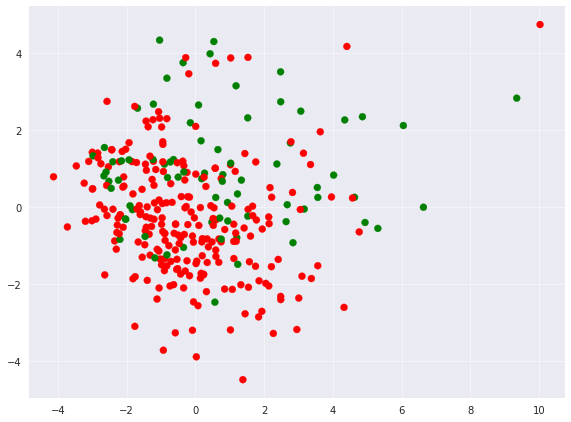

In [310]:
def color(x):
    if x == '0' :
        return('red')
    else :
        return'green'

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_std)
X_reduced = pca.transform(X_std)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=[color(x) for x in df_PCA.natural_product],
           cmap='RdYlBu')



In [311]:
#Contribution dezs variables
pca.components_.T * np.sqrt(pca.explained_variance_)

array([[ 0.74243666, -0.57707712,  0.20505678, -0.00976283],
       [-0.24039319, -0.85478299,  0.29073903,  0.21386412],
       [ 0.89966995,  0.30590956, -0.20082337, -0.11215916],
       [ 0.69764411, -0.62117369,  0.22911243,  0.02976639],
       [ 0.83685497,  0.03958441, -0.1092225 , -0.36989802],
       [ 0.63779762,  0.46641946, -0.21136101,  0.2701966 ],
       [ 0.01647188,  0.3977343 ,  0.83216493,  0.07444928],
       [ 0.50181645,  0.17203182, -0.43990231,  0.64017438],
       [ 0.77204637,  0.25593799,  0.29430313, -0.24773825],
       [ 0.18665472, -0.69304842, -0.61772875, -0.14206298],
       [ 0.580714  , -0.19049474,  0.44742161,  0.2950259 ]])

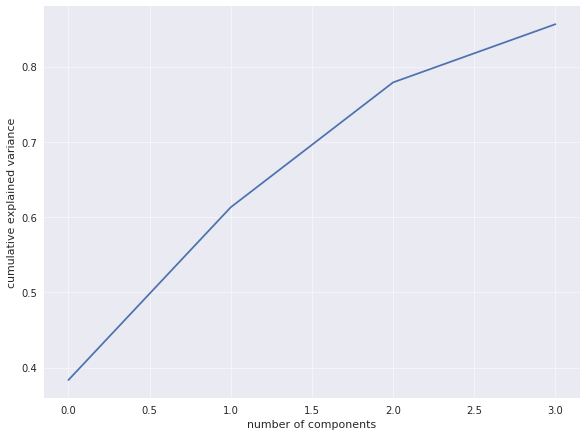

In [314]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [317]:
#Covariance matrix
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00315457  0.36065547  0.45387728  0.98315361  0.56318785  0.19041065
  -0.00697496  0.18755237  0.44464537  0.37747969  0.49854506]
 [ 0.36065547  1.00315457 -0.5303484   0.42090109 -0.36290779 -0.51236137
  -0.10653895 -0.27028058 -0.32240752  0.31518804  0.16770606]
 [ 0.45387728 -0.5303484   1.00315457  0.38692041  0.80710326  0.72494217
  -0.02953478  0.52162316  0.74457972  0.09078047  0.31001603]
 [ 0.98315361  0.42090109  0.38692041  1.00315457  0.51135378  0.15236402
   0.00378151  0.16963817  0.38982181  0.38473342  0.50451056]
 [ 0.56318785 -0.36290779  0.80710326  0.51135378  1.00315457  0.38150752
  -0.02247454  0.3113817   0.61298682  0.2439013   0.33788286]
 [ 0.19041065 -0.51236137  0.72494217  0.15236402  0.38150752  1.00315457
   0.04678011  0.51476216  0.46248628 -0.07992675  0.19991915]
 [-0.00697496 -0.10653895 -0.02953478  0.00378151 -0.02247454  0.04678011
   1.00315457 -0.2075417   0.21262567 -0.7598106   0.2195193 ]
 [ 0.18755237 -0.27028

In [318]:
cor_mat1 = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.36088091  0.3626534  -0.15156557 -0.01057007  0.30563526 -0.04327739
   0.07996522  0.70434755 -0.10511127  0.32281566  0.04603862]
 [-0.11684944  0.53717249 -0.21489671  0.23154745  0.02842945 -0.17181303
   0.20466093  0.0103513  -0.02619953 -0.71480983  0.11847529]
 [ 0.43730829 -0.19224318  0.14843649 -0.12143302  0.0473097  -0.03507706
   0.09381855 -0.090111   -0.74277908 -0.28430759 -0.28650054]
 [ 0.33910831  0.39036507 -0.16934606  0.03222762  0.31205813 -0.0408884
   0.03544685 -0.70163754  0.0281551   0.32788194  0.04473055]
 [ 0.40677542 -0.02487609  0.08073067 -0.40048299  0.05403722  0.47792375
  -0.21448874  0.00822321  0.23261655 -0.3445632   0.46558827]
 [ 0.31001834 -0.29311265  0.15622528  0.29253777  0.18687907 -0.65675477
  -0.36539917  0.02589342  0.19960874 -0.13228575  0.22407167]
 [ 0.00800659 -0.24994873 -0.615086    0.08060511  0.35070137  0.21091046
  -0.32277191  0.03177821  0.15471953 -0.19020274 -0.4688839 ]
 [ 0.24392112 -0.1081102   0

In [319]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.21913226851
2.52415689645
1.8246487882
0.850409303577
0.571561387696
0.444467817806
0.302255498003
0.110889437683
0.0885266472072
0.047597339973
0.0163546148906


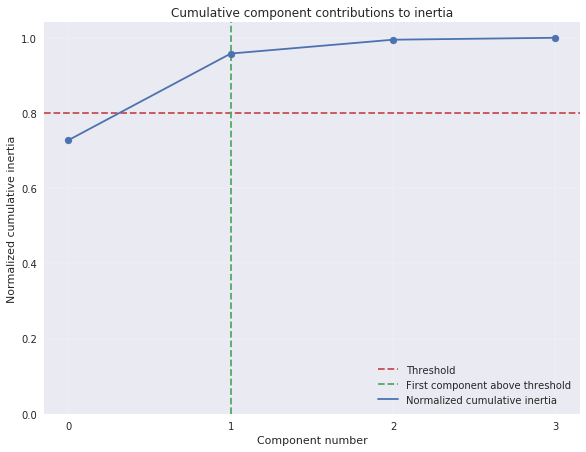

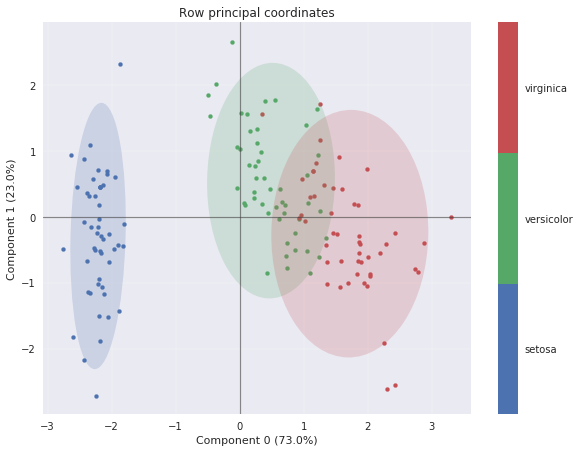

In [393]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import prince


df = pd.read_csv('/home/bournez/Téléchargements/IRIS.csv')
df["species"] = df["species"].astype('category')
pca = prince.PCA(df, n_components=4)

fig1, ax1 = pca.plot_cumulative_inertia()
fig2, ax2 = pca.plot_rows(color_by='species', ellipse_fill=True)

plt.show()

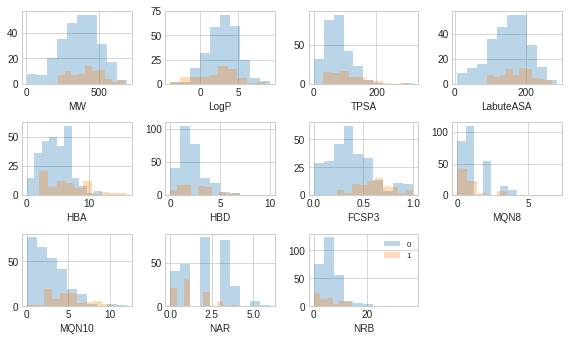

In [149]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: '0',
              2: '1'}
Aller
feature_dict = {0: 'MW',
                1: 'LogP',
                2: 'TPSA',
                3: 'LabuteASA',
                4: 'HBA',
                5 : 'HBD', 
                6: 'FCSP3',
                7:'MQN8',
                8:'MQN10', 
                9:'NAR',
                10:'NRB'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(11):
        plt.subplot(4, 4, cnt+1)
        for lab in ('0', '1'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()